In [1]:
# import dependencies
import requests, json
import pandas as pd
import matplotlib.pyplot as plt
from convert import convert_time

In [2]:
# Set urls
url = "http://localhost:5000"
past = "/api/v1/past"
upcoming = "/api/v1/upcoming"
rocket = "/api/v1/rocket"

In [3]:
# get rocket data launched in the past
response = requests.get(url+past).json()
past_df = pd.DataFrame(response)

In [4]:
# get upcoming launching rocket data
response = requests.get(url+upcoming).json()
upcoming_df = pd.DataFrame(response)

In [5]:
# get rocket data
response = requests.get(url+rocket).json()
rocket_df = pd.DataFrame(response)

## The number of rockets launched by organization

In [6]:
# Let's see how many rockets launched until now
nolr = past_df.replace(False, "Failed").replace(True, "Succeeded")
nolr = nolr.loc[:, ["Rocket", "Organization", "Success"]].groupby(["Organization", "Success"]).count().unstack("Success").fillna(0)
nolr.head()

Rocket          
Success      Failed Succeeded
Organization                 
AEB             3.0       0.0
AMBA            4.0       4.0
ASI             0.0       9.0
Arianespace    10.0     271.0
Arméedel'Air    1.0       3.0

In [7]:
# Success rate
nos = nolr[("Rocket", "Succeeded")].sum()
nof = nolr[("Rocket", "Failed")].sum()
nor = nolr[("Rocket", "Succeeded")].sum() + nolr[("Rocket", "Failed")].sum()
print("The number of successfully launched rockets: ", int(nos))
print("The number of failed rockets:", int(nof))
print("The number of total rockets launched:", int(nor))
print(f"Success Rate: {round(nos / nor * 100, 2)}%")

The number of successfully launched rockets:  4043
The number of failed rockets: 452
The number of total rockets launched: 4495
Success Rate: 89.94%


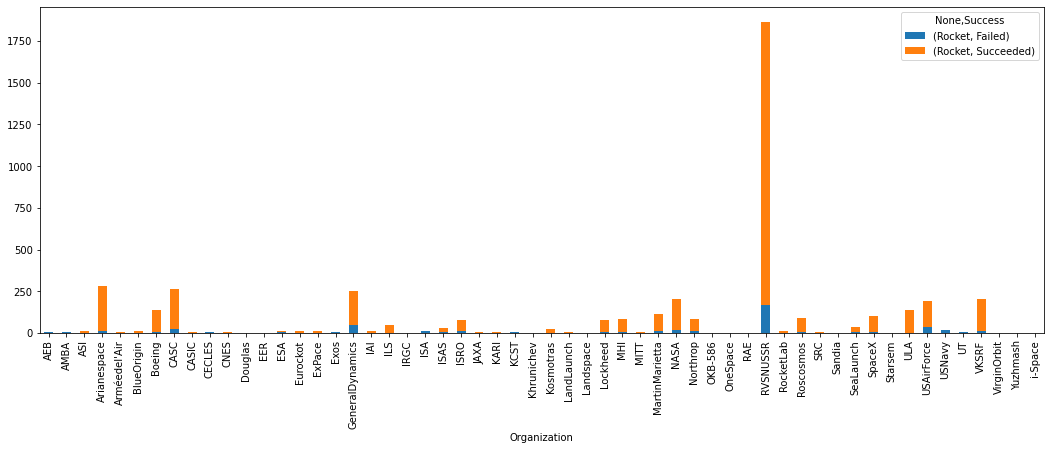

In [8]:
nolr.plot.bar(figsize=(18,6), width=0.5, stacked=True)
plt.show()

In [9]:
nolr[("Rocket", "Success Rate")] = nolr[("Rocket", "Succeeded")] / (nolr[("Rocket", "Failed")] + nolr[("Rocket", "Succeeded")]) * 100
nolr.sort_values(("Rocket", "Success Rate"), ascending = False).head(15)

Rocket                       
Success      Failed Succeeded Success Rate
Organization                              
i-Space         0.0       1.0   100.000000
ASI             0.0       9.0   100.000000
Yuzhmash        0.0       2.0   100.000000
BlueOrigin      0.0      12.0   100.000000
Starsem         0.0       1.0   100.000000
OKB-586         0.0       2.0   100.000000
Douglas         0.0       1.0   100.000000
Khrunichev      0.0       1.0   100.000000
IRGC            0.0       1.0   100.000000
ULA             1.0     139.0    99.285714
ILS             1.0      45.0    97.826087
Arianespace    10.0     271.0    96.441281
Boeing          5.0     131.0    96.323529
Roscosmos       4.0      87.0    95.604396
Kosmotras       1.0      21.0    95.454545

## The number of upcoming rockets to be launched

In [10]:
# The number of upcoming launching rockets 
nour = upcoming_df.loc[:, ["Rocket", "Organization"]].groupby("Organization").count()
nour.columns = ["Number of launched rockets"]

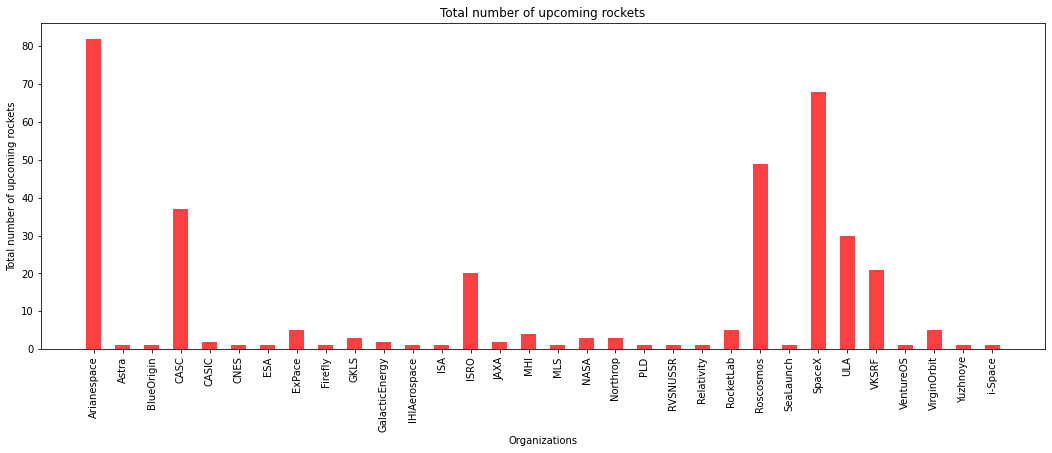

In [11]:
plt.figure(figsize=(18,6))
plt.bar(nour.index, nour.iloc[:, 0], color="r", alpha=0.75, width=0.5)
plt.xticks(rotation="vertical")
plt.title("Total number of upcoming rockets")
plt.xlabel("Organizations")
plt.ylabel("Total number of upcoming rockets")
plt.show()

## The number of rockets each manufacturer have

In [12]:
# Rockets that each manufacturer has
group_rocket = rocket_df.groupby(["Manufacturer", "Status"])["Name"].count().unstack("Status").fillna(0)
group_rocket = group_rocket.loc[:, ["Retired", "Active", "Planned"]]

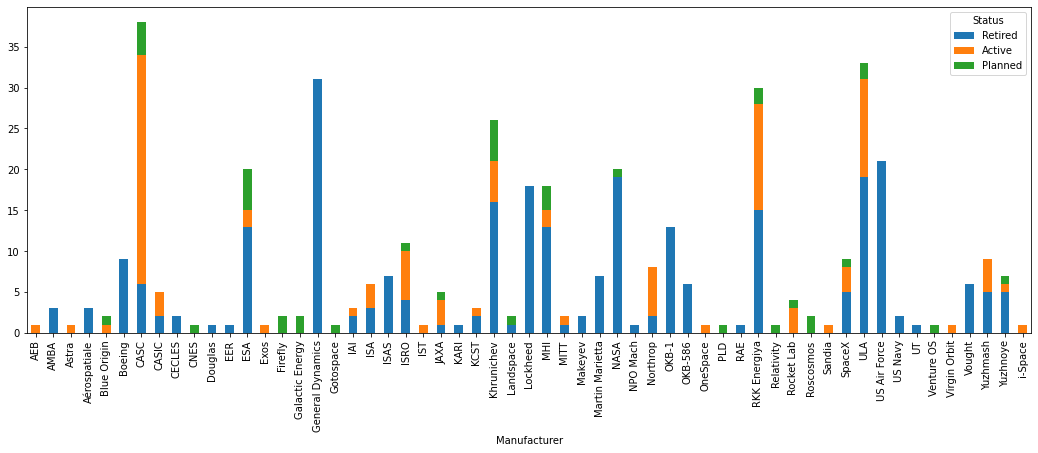

In [13]:
group_rocket.plot.bar(figsize=(18,6), width=0.5, stacked=True)
plt.show()

In [14]:
# Remove retired rockets
group_rocket = group_rocket.drop(columns = "Retired")
group_rocket.head()

Status,Active,Planned
Manufacturer,,
AEB,1.0,0.0
AMBA,0.0,0.0
Astra,1.0,0.0
Aérospatiale,0.0,0.0
Blue Origin,1.0,1.0


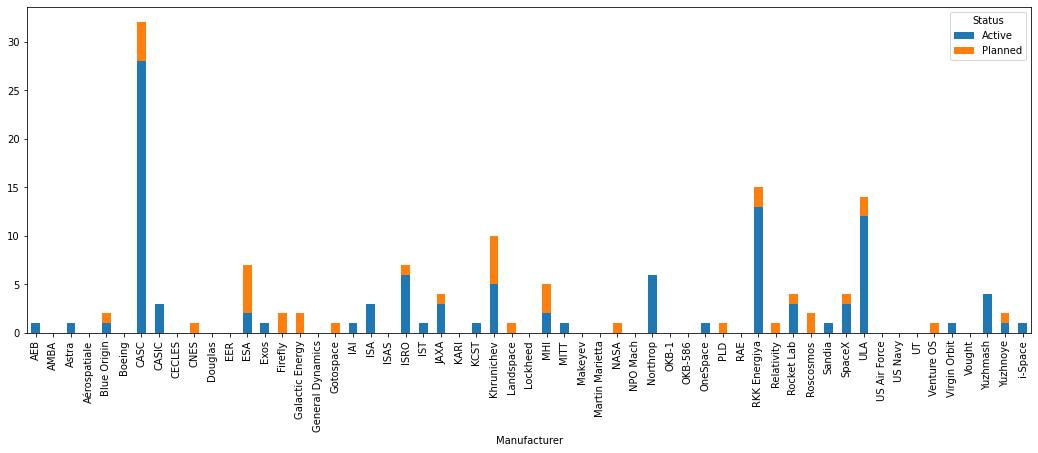

In [15]:
group_rocket.plot.bar(figsize=(18,6), width=0.5, stacked=True)
plt.show()